In [6]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
%matplotlib widget

from generate_data import generate_data

In [7]:
N_POINTS = 10
N_ORDER = 2
NOISE_FACTOR = 10

generate_data(N_POINTS, N_ORDER, NOISE_FACTOR)

In [8]:
xs = np.load('../data/xs.npy')
coefficients_original = np.load('../data/coefficients.npy')

xs_poly = np.linspace(-5, 5, 1000)
poly_original = np.poly1d(coefficients_original)
print(f"Equation of original:\n{poly_original}")

ys = poly_original(xs_poly)

Equation of original:
       2
3.847 x - 9.441 x - 8.758


In [9]:
ys_noise = np.load('../data/ys_noise.npy')

coefficients_np_polyfit = np.polyfit(xs, ys_noise, N_ORDER)
np_polyfit = np.poly1d(coefficients_np_polyfit)
print(f"Equation of np_poly1d_fit:\n{np_polyfit}\n")
ys_np_poly1d_fit = np_polyfit(xs_poly)

coefficients_vandermonde_pseudo_inverse_fit = np.linalg.pinv(np.vander(xs, N_ORDER+1)) @ ys_noise
vandermonde_pseudo_inverse_fit = np.poly1d(coefficients_vandermonde_pseudo_inverse_fit)
print(f"Equation of vandermonde_pseudo_inverse_fit:\n{vandermonde_pseudo_inverse_fit}")
ys_vandermonde_pseudo_inverse_fit = vandermonde_pseudo_inverse_fit(xs_poly)

assert(np.allclose(ys_np_poly1d_fit, ys_vandermonde_pseudo_inverse_fit))

Equation of np_poly1d_fit:
       2
3.475 x - 10.29 x - 8.901

Equation of vandermonde_pseudo_inverse_fit:
       2
3.475 x - 10.29 x - 8.901


Text(0, 0.5, '$y$')

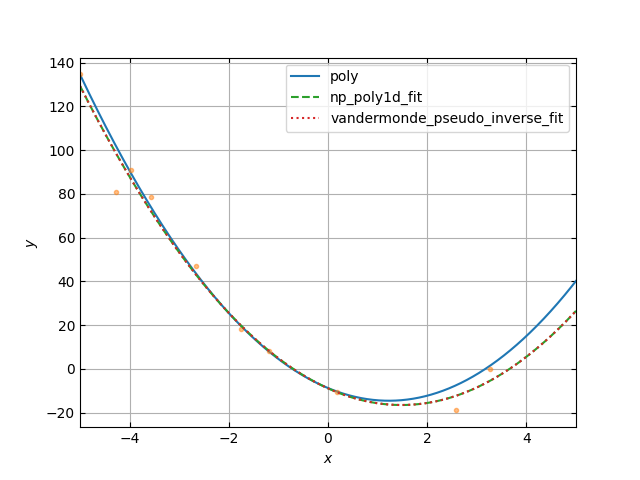

In [10]:
fig, ax = plt.subplots()
ax.plot(xs_poly, ys, '-', label='poly')
ax.plot(xs, ys_noise, '.', alpha=0.5)
ax.plot(xs_poly, ys_np_poly1d_fit, '--', label='np_poly1d_fit')
ax.plot(xs_poly, ys_vandermonde_pseudo_inverse_fit, ':', label='vandermonde_pseudo_inverse_fit')

ax.legend()
ax.set_xlim(xs_poly[0], xs_poly[-1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')